<a href="https://colab.research.google.com/github/NehaKumari500092077/MtechFinal/blob/main/minus15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from datetime import datetime
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time
from tqdm import tqdm
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
import warnings
import itertools
from itertools import product

warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [224, 224]


#Give dataset path
train_path = '/content/drive/MyDrive/TrainData/-15db_data/Training'
test_path = '/content/drive/MyDrive/TrainData/-15db_data/Testing'


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

vgg.input

for layer in vgg.layers:
  layer.trainable = False
  
folders = glob('/content/drive/MyDrive/TrainData/-15db_data/Training/*')
print(len(folders))

x = vgg.output
x = Flatten(name="flatten")(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1052, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
	
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
	
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 31,
                                                 class_mode = 'categorical')
												 
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 31,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/TrainData/slt__15db_ecg_1.0.h5', 
                              verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(train_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=40,
  validation_steps=10, 
  callbacks=callbacks,verbose=2)

duration = datetime.now() - start
print("Training completed in time: ", duration)

3
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0

  0%|          | 0/3720 [00:00<?, ?it/s]

1/1 [==============================] - 0s 165ms/step


  0%|          | 1/3720 [00:00<15:05,  4.11it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 3/3720 [00:00<07:11,  8.61it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 5/3720 [00:00<05:45, 10.76it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 7/3720 [00:00<05:04, 12.20it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 9/3720 [00:01<11:04,  5.58it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 11/3720 [00:01<08:59,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 13/3720 [00:01<07:41,  8.03it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 15/3720 [00:01<06:47,  9.10it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 17/3720 [00:02<06:18,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 19/3720 [00:02<05:56, 10.39it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 21/3720 [00:02<05:40, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 23/3720 [00:02<05:29, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 25/3720 [00:02<05:22, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 27/3720 [00:02<05:21, 11.47it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 29/3720 [00:03<05:17, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 31/3720 [00:03<05:11, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 33/3720 [00:03<05:07, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 35/3720 [00:03<05:12, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 37/3720 [00:03<05:11, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 39/3720 [00:03<05:06, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 41/3720 [00:03<05:03, 12.12it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 43/3720 [00:04<05:03, 12.13it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 45/3720 [00:04<05:16, 11.62it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 47/3720 [00:04<05:12, 11.76it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 49/3720 [00:04<05:10, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 51/3720 [00:04<05:11, 11.78it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 53/3720 [00:05<05:14, 11.66it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 55/3720 [00:05<05:12, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 57/3720 [00:05<05:12, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 59/3720 [00:05<05:11, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 61/3720 [00:05<05:15, 11.58it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 63/3720 [00:05<05:18, 11.49it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 65/3720 [00:06<05:17, 11.51it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 67/3720 [00:06<05:20, 11.39it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 69/3720 [00:06<05:17, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 71/3720 [00:06<05:18, 11.47it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 73/3720 [00:06<05:14, 11.59it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 75/3720 [00:06<05:15, 11.56it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 77/3720 [00:07<05:12, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 79/3720 [00:07<05:17, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 81/3720 [00:07<05:17, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 83/3720 [00:07<05:17, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 85/3720 [00:07<05:19, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 87/3720 [00:08<05:27, 11.08it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 89/3720 [00:08<05:22, 11.25it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 91/3720 [00:08<05:18, 11.39it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▎         | 93/3720 [00:08<05:15, 11.49it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 95/3720 [00:08<05:23, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 97/3720 [00:08<05:42, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 99/3720 [00:09<05:42, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 101/3720 [00:09<05:41, 10.60it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 103/3720 [00:09<05:34, 10.82it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 105/3720 [00:09<05:31, 10.92it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 107/3720 [00:09<05:25, 11.10it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 109/3720 [00:10<05:25, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 111/3720 [00:10<05:21, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 113/3720 [00:10<05:28, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 115/3720 [00:10<05:31, 10.89it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 117/3720 [00:10<05:26, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 119/3720 [00:10<05:19, 11.27it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 121/3720 [00:11<05:21, 11.18it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 123/3720 [00:11<05:32, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 125/3720 [00:11<05:19, 11.25it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 127/3720 [00:11<05:12, 11.48it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 129/3720 [00:11<05:08, 11.64it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▎         | 131/3720 [00:11<05:05, 11.75it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 133/3720 [00:12<05:08, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 135/3720 [00:12<05:06, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 137/3720 [00:12<05:02, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 139/3720 [00:12<05:01, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 141/3720 [00:12<05:06, 11.67it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 143/3720 [00:12<05:03, 11.80it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 145/3720 [00:13<04:59, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 147/3720 [00:13<05:03, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 149/3720 [00:13<05:03, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 151/3720 [00:13<05:00, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 153/3720 [00:13<04:55, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 155/3720 [00:13<04:52, 12.19it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 157/3720 [00:14<04:49, 12.30it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 159/3720 [00:14<04:59, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 161/3720 [00:14<04:53, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 163/3720 [00:14<04:47, 12.36it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 165/3720 [00:14<04:39, 12.70it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 167/3720 [00:14<04:40, 12.65it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 169/3720 [00:15<04:38, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 171/3720 [00:15<04:45, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 173/3720 [00:15<04:42, 12.56it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 175/3720 [00:15<04:37, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 177/3720 [00:15<04:38, 12.72it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 179/3720 [00:15<04:36, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 181/3720 [00:15<04:30, 13.07it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 183/3720 [00:16<04:23, 13.42it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 185/3720 [00:16<04:30, 13.06it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 187/3720 [00:16<04:35, 12.80it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 189/3720 [00:16<04:29, 13.09it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 191/3720 [00:16<04:27, 13.21it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 193/3720 [00:16<04:32, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 195/3720 [00:17<04:36, 12.74it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 197/3720 [00:17<04:39, 12.61it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 199/3720 [00:17<04:38, 12.65it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 201/3720 [00:17<04:36, 12.73it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 203/3720 [00:17<04:43, 12.42it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 205/3720 [00:17<04:36, 12.71it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 207/3720 [00:18<04:32, 12.90it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 209/3720 [00:18<04:27, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 211/3720 [00:18<04:32, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 213/3720 [00:18<04:31, 12.90it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 215/3720 [00:18<04:26, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 217/3720 [00:18<04:25, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 219/3720 [00:18<04:22, 13.35it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 221/3720 [00:19<04:26, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 223/3720 [00:19<04:23, 13.25it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 225/3720 [00:19<04:22, 13.34it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 227/3720 [00:19<04:17, 13.54it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 229/3720 [00:19<04:19, 13.47it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 231/3720 [00:19<04:16, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 233/3720 [00:19<04:15, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 235/3720 [00:20<04:13, 13.75it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 237/3720 [00:20<04:12, 13.77it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 239/3720 [00:20<04:17, 13.54it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 241/3720 [00:20<04:14, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 243/3720 [00:20<04:11, 13.82it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 245/3720 [00:20<04:09, 13.92it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 247/3720 [00:20<04:17, 13.50it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 249/3720 [00:21<04:16, 13.52it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 251/3720 [00:21<04:16, 13.52it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 253/3720 [00:21<04:23, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 255/3720 [00:21<04:24, 13.09it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 257/3720 [00:21<04:31, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 259/3720 [00:21<04:32, 12.68it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 261/3720 [00:22<04:31, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 263/3720 [00:22<04:25, 13.04it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 265/3720 [00:22<04:30, 12.78it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 267/3720 [00:22<04:34, 12.57it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 269/3720 [00:22<04:33, 12.60it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 271/3720 [00:22<04:34, 12.57it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 273/3720 [00:23<04:26, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 275/3720 [00:23<04:32, 12.62it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 277/3720 [00:23<04:33, 12.60it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 279/3720 [00:23<04:35, 12.48it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 281/3720 [00:23<04:36, 12.43it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 283/3720 [00:23<04:41, 12.21it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 285/3720 [00:23<04:37, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 287/3720 [00:24<04:32, 12.60it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 289/3720 [00:24<04:25, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 291/3720 [00:24<04:25, 12.90it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 293/3720 [00:24<04:24, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 295/3720 [00:24<04:17, 13.29it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 297/3720 [00:24<04:13, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 299/3720 [00:25<04:09, 13.72it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 301/3720 [00:25<04:14, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 303/3720 [00:25<04:14, 13.41it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 305/3720 [00:25<04:12, 13.55it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 307/3720 [00:25<04:06, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 309/3720 [00:25<04:09, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 311/3720 [00:25<04:12, 13.49it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 313/3720 [00:26<04:10, 13.61it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 315/3720 [00:26<04:05, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 317/3720 [00:26<04:04, 13.93it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 319/3720 [00:26<04:08, 13.67it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 321/3720 [00:26<04:06, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 323/3720 [00:26<04:04, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 325/3720 [00:26<03:59, 14.15it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 327/3720 [00:27<04:02, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 329/3720 [00:27<04:01, 14.02it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 331/3720 [00:27<04:04, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 333/3720 [00:27<04:06, 13.72it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 335/3720 [00:27<04:05, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 337/3720 [00:27<04:08, 13.59it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 339/3720 [00:27<04:09, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 341/3720 [00:28<04:06, 13.72it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 343/3720 [00:28<04:03, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 345/3720 [00:28<04:04, 13.80it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 347/3720 [00:28<04:01, 13.96it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 349/3720 [00:28<03:59, 14.06it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 351/3720 [00:28<04:01, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 353/3720 [00:28<04:01, 13.96it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 355/3720 [00:29<04:05, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 357/3720 [00:29<04:05, 13.70it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 359/3720 [00:29<04:01, 13.91it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 361/3720 [00:29<03:58, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 363/3720 [00:29<04:02, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 365/3720 [00:29<04:10, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 367/3720 [00:29<04:06, 13.58it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 369/3720 [00:30<04:04, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 371/3720 [00:30<04:06, 13.58it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 373/3720 [00:30<04:11, 13.33it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 375/3720 [00:30<04:08, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 377/3720 [00:30<04:07, 13.50it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 379/3720 [00:30<04:00, 13.87it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 381/3720 [00:31<04:05, 13.59it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 383/3720 [00:31<04:05, 13.57it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 385/3720 [00:31<04:04, 13.65it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 387/3720 [00:31<04:03, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 389/3720 [00:31<04:00, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 391/3720 [00:31<04:03, 13.64it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 393/3720 [00:31<04:03, 13.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 395/3720 [00:32<03:57, 13.99it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 397/3720 [00:32<03:54, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 399/3720 [00:32<03:56, 14.04it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 401/3720 [00:32<03:55, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 403/3720 [00:32<03:53, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 405/3720 [00:32<03:53, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 407/3720 [00:32<03:54, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 409/3720 [00:32<03:53, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 411/3720 [00:33<03:51, 14.27it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 413/3720 [00:33<03:52, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 415/3720 [00:33<03:52, 14.21it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 417/3720 [00:33<03:59, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 419/3720 [00:33<03:59, 13.79it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 421/3720 [00:33<03:53, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 423/3720 [00:33<03:55, 14.01it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 425/3720 [00:34<04:03, 13.53it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 427/3720 [00:34<04:16, 12.85it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 429/3720 [00:34<04:11, 13.11it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 431/3720 [00:34<04:03, 13.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 433/3720 [00:34<04:03, 13.49it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 435/3720 [00:34<04:16, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 437/3720 [00:35<04:17, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 439/3720 [00:35<04:14, 12.87it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 441/3720 [00:35<04:17, 12.75it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 443/3720 [00:35<04:25, 12.37it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 445/3720 [00:35<04:28, 12.21it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 447/3720 [00:35<04:20, 12.57it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 449/3720 [00:36<04:13, 12.90it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 451/3720 [00:36<04:09, 13.11it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 453/3720 [00:36<04:12, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 455/3720 [00:36<04:15, 12.80it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 457/3720 [00:36<04:12, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 459/3720 [00:36<04:14, 12.80it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 461/3720 [00:36<04:19, 12.55it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 463/3720 [00:37<04:13, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▎        | 465/3720 [00:37<04:09, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 467/3720 [00:37<04:06, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 469/3720 [00:37<04:02, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 471/3720 [00:37<04:03, 13.35it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 473/3720 [00:37<04:01, 13.43it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 475/3720 [00:38<04:00, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 477/3720 [00:38<03:57, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 479/3720 [00:38<04:00, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 481/3720 [00:38<03:59, 13.52it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 483/3720 [00:38<03:55, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 485/3720 [00:38<03:55, 13.74it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 487/3720 [00:38<03:59, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 489/3720 [00:39<03:57, 13.59it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 491/3720 [00:39<03:57, 13.62it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 493/3720 [00:39<04:00, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 495/3720 [00:39<04:02, 13.32it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 497/3720 [00:39<04:06, 13.06it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 499/3720 [00:39<04:10, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 501/3720 [00:39<04:09, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 503/3720 [00:40<04:06, 13.05it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 505/3720 [00:40<04:09, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 507/3720 [00:40<04:09, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 509/3720 [00:40<04:07, 12.98it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 511/3720 [00:40<04:04, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 513/3720 [00:40<04:02, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 515/3720 [00:41<04:02, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 517/3720 [00:41<04:01, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 519/3720 [00:41<03:57, 13.50it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 521/3720 [00:41<03:54, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 523/3720 [00:41<03:56, 13.50it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 525/3720 [00:41<03:53, 13.70it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 527/3720 [00:41<03:51, 13.81it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 529/3720 [00:42<03:49, 13.90it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 531/3720 [00:42<03:50, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 533/3720 [00:42<03:53, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 535/3720 [00:42<03:50, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 537/3720 [00:42<03:46, 14.07it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 539/3720 [00:42<03:47, 14.01it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 541/3720 [00:42<03:50, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 543/3720 [00:43<03:52, 13.67it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 545/3720 [00:43<03:54, 13.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 547/3720 [00:43<03:55, 13.47it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 549/3720 [00:43<03:56, 13.40it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 551/3720 [00:43<03:58, 13.28it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 553/3720 [00:43<03:56, 13.40it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 555/3720 [00:43<03:55, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 557/3720 [00:44<03:51, 13.69it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 559/3720 [00:44<03:52, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 561/3720 [00:44<03:51, 13.64it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 563/3720 [00:44<03:49, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 565/3720 [00:44<03:48, 13.82it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 567/3720 [00:44<03:52, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 569/3720 [00:44<03:55, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 571/3720 [00:45<03:54, 13.43it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 573/3720 [00:45<03:58, 13.21it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 575/3720 [00:45<03:59, 13.15it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 577/3720 [00:45<04:00, 13.05it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 579/3720 [00:45<04:04, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 581/3720 [00:45<04:07, 12.68it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 583/3720 [00:46<04:08, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 585/3720 [00:46<04:06, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 587/3720 [00:46<04:10, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 589/3720 [00:46<04:08, 12.62it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 591/3720 [00:46<04:05, 12.73it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 593/3720 [00:46<04:00, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 595/3720 [00:47<04:20, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 597/3720 [00:47<04:26, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 599/3720 [00:47<04:25, 11.75it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 601/3720 [00:47<04:18, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 603/3720 [00:47<04:19, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 605/3720 [00:47<04:28, 11.61it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 607/3720 [00:48<04:22, 11.86it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 609/3720 [00:48<04:19, 12.00it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 611/3720 [00:48<04:14, 12.22it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 613/3720 [00:48<04:14, 12.22it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 615/3720 [00:48<04:09, 12.45it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 617/3720 [00:48<04:09, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 619/3720 [00:49<04:03, 12.71it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 621/3720 [00:49<03:56, 13.09it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 623/3720 [00:49<03:55, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 625/3720 [00:49<03:56, 13.06it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 627/3720 [00:49<03:59, 12.93it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 629/3720 [00:49<04:04, 12.67it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 631/3720 [00:49<04:05, 12.58it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 633/3720 [00:50<03:59, 12.91it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 635/3720 [00:50<03:52, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 637/3720 [00:50<03:49, 13.45it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 639/3720 [00:50<03:44, 13.74it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 641/3720 [00:50<03:44, 13.73it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 643/3720 [00:50<03:41, 13.89it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 645/3720 [00:50<03:41, 13.91it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 647/3720 [00:51<03:40, 13.91it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 649/3720 [00:51<03:42, 13.81it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 651/3720 [00:51<03:43, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 653/3720 [00:51<03:39, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 655/3720 [00:51<03:40, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 657/3720 [00:51<03:44, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 659/3720 [00:51<03:42, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 661/3720 [00:52<03:43, 13.70it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 663/3720 [00:52<03:43, 13.67it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 665/3720 [00:52<03:43, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 667/3720 [00:52<03:46, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 669/3720 [00:52<03:47, 13.42it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 671/3720 [00:52<03:49, 13.30it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 673/3720 [00:53<03:54, 13.02it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 675/3720 [00:53<03:57, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 677/3720 [00:53<03:57, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 679/3720 [00:53<03:57, 12.82it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 681/3720 [00:53<03:58, 12.72it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 683/3720 [00:53<03:56, 12.86it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 685/3720 [00:53<04:02, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 687/3720 [00:54<04:03, 12.47it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 689/3720 [00:54<04:02, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 691/3720 [00:54<03:56, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 693/3720 [00:54<03:58, 12.69it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 695/3720 [00:54<03:56, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 697/3720 [00:54<03:52, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 699/3720 [00:55<03:47, 13.27it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 701/3720 [00:55<03:42, 13.57it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 703/3720 [00:55<03:44, 13.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 705/3720 [00:55<03:44, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 707/3720 [00:55<03:45, 13.37it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 709/3720 [00:55<03:45, 13.35it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 711/3720 [00:55<03:44, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 713/3720 [00:56<03:43, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 715/3720 [00:56<03:41, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 717/3720 [00:56<03:41, 13.58it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 719/3720 [00:56<03:36, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 721/3720 [00:56<03:37, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 723/3720 [00:56<03:36, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 725/3720 [00:56<03:35, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 727/3720 [00:57<03:32, 14.10it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 729/3720 [00:57<03:35, 13.88it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 731/3720 [00:57<03:39, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 733/3720 [00:57<03:38, 13.64it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 735/3720 [00:57<03:39, 13.62it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 737/3720 [00:57<03:44, 13.32it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 739/3720 [00:58<03:45, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 741/3720 [00:58<03:42, 13.37it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 743/3720 [00:58<03:37, 13.71it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 745/3720 [00:58<03:33, 13.90it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 747/3720 [00:58<03:42, 13.38it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 749/3720 [00:58<03:44, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 751/3720 [00:58<03:45, 13.16it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 753/3720 [00:59<03:44, 13.22it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 755/3720 [00:59<03:50, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 757/3720 [00:59<03:49, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 759/3720 [00:59<03:46, 13.06it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 761/3720 [00:59<03:41, 13.36it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 763/3720 [00:59<03:37, 13.58it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 765/3720 [00:59<03:49, 12.87it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 767/3720 [01:00<03:50, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 769/3720 [01:00<03:45, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 771/3720 [01:00<03:46, 13.02it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 773/3720 [01:00<03:56, 12.45it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 775/3720 [01:00<03:59, 12.32it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 777/3720 [01:00<04:02, 12.15it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 779/3720 [01:01<03:59, 12.27it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 781/3720 [01:01<03:59, 12.30it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 783/3720 [01:01<03:59, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 785/3720 [01:01<03:56, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 787/3720 [01:01<03:52, 12.59it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 789/3720 [01:01<03:59, 12.25it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 791/3720 [01:02<04:04, 11.97it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 793/3720 [01:02<04:10, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 795/3720 [01:02<04:10, 11.69it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 797/3720 [01:02<04:03, 12.02it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 799/3720 [01:02<03:59, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 801/3720 [01:02<04:03, 12.00it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 803/3720 [01:03<03:51, 12.62it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 805/3720 [01:03<03:45, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 807/3720 [01:03<03:38, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 809/3720 [01:03<03:36, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 811/3720 [01:03<03:33, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 813/3720 [01:03<03:30, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 815/3720 [01:03<03:28, 13.90it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 817/3720 [01:04<03:27, 13.97it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 819/3720 [01:04<03:29, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 821/3720 [01:04<03:30, 13.75it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 823/3720 [01:04<03:28, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 825/3720 [01:04<03:25, 14.11it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 827/3720 [01:04<03:32, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 829/3720 [01:04<03:32, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 831/3720 [01:05<03:30, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 833/3720 [01:05<03:30, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 835/3720 [01:05<03:31, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▎       | 837/3720 [01:05<03:37, 13.28it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 839/3720 [01:05<03:38, 13.17it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 841/3720 [01:05<03:38, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 843/3720 [01:05<03:36, 13.32it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 845/3720 [01:06<03:37, 13.20it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 847/3720 [01:06<03:37, 13.20it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 849/3720 [01:06<03:36, 13.26it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 851/3720 [01:06<03:30, 13.63it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 853/3720 [01:06<03:29, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 855/3720 [01:06<03:29, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 857/3720 [01:07<03:29, 13.66it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 859/3720 [01:07<03:26, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 861/3720 [01:07<03:28, 13.74it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 863/3720 [01:07<03:31, 13.53it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 865/3720 [01:07<03:33, 13.37it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 867/3720 [01:07<03:33, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 869/3720 [01:07<03:29, 13.59it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 871/3720 [01:08<03:32, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 873/3720 [01:08<03:38, 13.00it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 875/3720 [01:08<03:39, 12.97it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 877/3720 [01:08<03:38, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 879/3720 [01:08<03:33, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 881/3720 [01:08<03:37, 13.04it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 883/3720 [01:08<03:33, 13.26it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 885/3720 [01:09<03:28, 13.58it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 887/3720 [01:09<03:27, 13.64it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 889/3720 [01:09<03:31, 13.37it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 891/3720 [01:09<03:35, 13.10it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 893/3720 [01:09<03:30, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 895/3720 [01:09<03:29, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 897/3720 [01:10<03:27, 13.60it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 899/3720 [01:10<03:32, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 901/3720 [01:10<03:29, 13.46it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 903/3720 [01:10<03:26, 13.67it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 905/3720 [01:10<03:26, 13.64it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 907/3720 [01:10<03:28, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 909/3720 [01:10<03:29, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 911/3720 [01:11<03:26, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 913/3720 [01:11<03:25, 13.66it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 915/3720 [01:11<03:31, 13.23it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 917/3720 [01:11<03:34, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 919/3720 [01:11<03:31, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 921/3720 [01:11<03:28, 13.41it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 923/3720 [01:11<03:26, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 925/3720 [01:12<03:27, 13.45it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 927/3720 [01:12<03:26, 13.51it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 929/3720 [01:12<03:27, 13.48it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 931/3720 [01:12<03:26, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 933/3720 [01:12<03:33, 13.05it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 935/3720 [01:12<03:42, 12.54it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 937/3720 [01:13<03:44, 12.38it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 939/3720 [01:13<03:42, 12.50it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 941/3720 [01:13<03:39, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 943/3720 [01:13<03:40, 12.60it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 945/3720 [01:13<03:41, 12.51it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 947/3720 [01:13<03:44, 12.33it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 949/3720 [01:14<03:43, 12.41it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 951/3720 [01:14<03:46, 12.24it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 953/3720 [01:14<03:43, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 955/3720 [01:14<03:41, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 957/3720 [01:14<03:38, 12.63it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 959/3720 [01:14<03:35, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 961/3720 [01:14<03:41, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 963/3720 [01:15<03:36, 12.71it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 965/3720 [01:15<03:36, 12.75it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 967/3720 [01:15<03:45, 12.21it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 969/3720 [01:15<03:46, 12.17it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 971/3720 [01:15<03:47, 12.10it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 973/3720 [01:15<03:42, 12.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 975/3720 [01:16<03:39, 12.52it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 977/3720 [01:16<03:31, 13.00it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 979/3720 [01:16<03:30, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 981/3720 [01:16<03:28, 13.12it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 983/3720 [01:16<03:25, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 985/3720 [01:16<03:24, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 987/3720 [01:16<03:25, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 989/3720 [01:17<03:23, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 991/3720 [01:17<03:24, 13.34it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 993/3720 [01:17<03:23, 13.43it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 995/3720 [01:17<03:21, 13.51it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 997/3720 [01:17<03:26, 13.20it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 999/3720 [01:17<03:25, 13.26it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1001/3720 [01:18<03:22, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 1003/3720 [01:18<03:21, 13.51it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1005/3720 [01:18<03:21, 13.47it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1007/3720 [01:18<03:21, 13.47it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 1009/3720 [01:18<03:19, 13.62it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 1011/3720 [01:18<03:15, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1013/3720 [01:18<03:13, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1015/3720 [01:19<03:18, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1017/3720 [01:19<03:19, 13.52it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1019/3720 [01:19<03:19, 13.52it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 1021/3720 [01:19<03:16, 13.75it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 1023/3720 [01:19<03:15, 13.78it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 1025/3720 [01:19<03:18, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 1027/3720 [01:19<03:16, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 1029/3720 [01:20<03:13, 13.90it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 1031/3720 [01:20<03:14, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 1033/3720 [01:20<03:17, 13.63it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 1035/3720 [01:20<03:18, 13.56it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 1037/3720 [01:20<03:14, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 1039/3720 [01:20<03:12, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1041/3720 [01:21<06:02,  7.38it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 1043/3720 [01:21<05:21,  8.32it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1045/3720 [01:21<04:50,  9.20it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1047/3720 [01:21<04:28,  9.96it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1049/3720 [01:22<04:14, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1051/3720 [01:22<04:09, 10.69it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1053/3720 [01:22<04:01, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1055/3720 [01:22<03:56, 11.27it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1057/3720 [01:22<03:51, 11.50it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 1059/3720 [01:22<03:56, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1061/3720 [01:23<03:53, 11.41it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 1063/3720 [01:23<03:47, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1065/3720 [01:23<03:45, 11.78it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 1067/3720 [01:23<03:42, 11.90it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1069/3720 [01:23<03:46, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1071/3720 [01:23<03:44, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1073/3720 [01:24<03:43, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 1075/3720 [01:24<03:41, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1077/3720 [01:24<03:46, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1079/3720 [01:24<03:43, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1081/3720 [01:24<03:43, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1083/3720 [01:24<03:42, 11.83it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1085/3720 [01:25<03:48, 11.53it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 1087/3720 [01:25<03:46, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1089/3720 [01:25<03:44, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 1091/3720 [01:25<03:45, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 1093/3720 [01:25<03:49, 11.42it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 1095/3720 [01:25<03:52, 11.28it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 1097/3720 [01:26<03:54, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 1099/3720 [01:26<03:54, 11.20it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 1101/3720 [01:26<04:02, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1103/3720 [01:26<04:05, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1105/3720 [01:26<03:57, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1107/3720 [01:27<03:57, 10.99it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 1109/3720 [01:27<03:56, 11.05it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 1111/3720 [01:27<04:00, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 1113/3720 [01:27<04:07, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 1115/3720 [01:27<04:03, 10.71it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 1117/3720 [01:28<04:11, 10.35it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 1119/3720 [01:28<04:08, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 1121/3720 [01:28<04:09, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 1123/3720 [01:28<04:02, 10.70it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 1125/3720 [01:28<03:58, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 1127/3720 [01:28<03:49, 11.30it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 1129/3720 [01:29<03:51, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 1131/3720 [01:29<03:46, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 1133/3720 [01:29<03:44, 11.52it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1135/3720 [01:29<03:39, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 1137/3720 [01:29<03:34, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1139/3720 [01:29<03:36, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 1141/3720 [01:30<03:32, 12.14it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 1143/3720 [01:30<03:31, 12.20it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1145/3720 [01:30<03:31, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 1147/3720 [01:30<03:31, 12.18it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1149/3720 [01:30<03:30, 12.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1151/3720 [01:30<03:25, 12.50it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1153/3720 [01:31<03:21, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1155/3720 [01:31<03:15, 13.09it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 1157/3720 [01:31<03:19, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1159/3720 [01:31<06:20,  6.73it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1161/3720 [01:32<05:24,  7.89it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 1163/3720 [01:32<04:44,  8.97it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 1165/3720 [01:32<04:21,  9.76it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 1167/3720 [01:32<04:04, 10.44it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 1169/3720 [01:32<03:47, 11.20it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 1171/3720 [01:32<03:33, 11.95it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 1173/3720 [01:33<03:25, 12.37it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 1175/3720 [01:33<03:26, 12.34it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1177/3720 [01:33<03:20, 12.69it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1179/3720 [01:33<03:15, 13.02it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1181/3720 [01:33<03:13, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 1183/3720 [01:33<03:15, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1185/3720 [01:33<03:14, 13.03it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1187/3720 [01:34<03:11, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1189/3720 [01:34<03:06, 13.54it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1191/3720 [01:34<03:03, 13.79it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 1193/3720 [01:34<03:06, 13.58it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 1195/3720 [01:34<03:06, 13.51it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 1197/3720 [01:34<03:08, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1199/3720 [01:34<03:05, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 1201/3720 [01:35<03:07, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1203/3720 [01:35<03:06, 13.52it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1205/3720 [01:35<03:03, 13.72it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1207/3720 [01:35<03:03, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▎      | 1209/3720 [01:35<03:02, 13.78it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 1211/3720 [01:35<03:08, 13.33it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1213/3720 [01:36<03:06, 13.47it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1215/3720 [01:36<03:02, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 1217/3720 [01:36<03:03, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1219/3720 [01:36<03:07, 13.33it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1221/3720 [01:36<03:06, 13.41it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 1223/3720 [01:36<03:04, 13.52it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 1225/3720 [01:36<03:02, 13.68it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 1227/3720 [01:37<03:00, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1229/3720 [01:37<03:05, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 1231/3720 [01:37<03:07, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1233/3720 [01:37<03:05, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1235/3720 [01:37<03:05, 13.41it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 1237/3720 [01:37<03:09, 13.11it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 1239/3720 [01:37<03:10, 13.05it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 1241/3720 [01:38<03:06, 13.32it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 1243/3720 [01:38<03:04, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 1245/3720 [01:38<03:02, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 1247/3720 [01:38<03:06, 13.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 1249/3720 [01:38<03:12, 12.81it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 1251/3720 [01:38<03:14, 12.66it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 1253/3720 [01:39<03:14, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 1255/3720 [01:39<03:13, 12.76it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 1257/3720 [01:39<03:13, 12.73it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 1259/3720 [01:39<03:10, 12.92it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 1261/3720 [01:39<03:13, 12.69it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 1263/3720 [01:39<03:20, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 1265/3720 [01:40<03:21, 12.19it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 1267/3720 [01:40<03:15, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 1269/3720 [01:40<03:16, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 1271/3720 [01:40<03:12, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 1273/3720 [01:40<03:23, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1275/3720 [01:40<03:23, 12.03it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 1277/3720 [01:40<03:24, 11.95it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 1279/3720 [01:41<03:18, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 1281/3720 [01:41<03:21, 12.09it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 1283/3720 [01:41<03:22, 12.06it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 1285/3720 [01:41<03:20, 12.13it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 1287/3720 [01:41<03:13, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 1289/3720 [01:41<03:10, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 1291/3720 [01:42<03:08, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 1293/3720 [01:42<03:08, 12.90it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 1295/3720 [01:42<03:04, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 1297/3720 [01:42<03:02, 13.31it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 1299/3720 [01:42<03:00, 13.38it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 1301/3720 [01:42<02:58, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 1303/3720 [01:42<03:00, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 1305/3720 [01:43<03:02, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 1307/3720 [01:43<03:03, 13.17it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 1309/3720 [01:43<03:06, 12.91it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 1311/3720 [01:43<03:01, 13.30it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 1313/3720 [01:43<02:59, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 1315/3720 [01:43<02:55, 13.71it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 1317/3720 [01:44<03:01, 13.24it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 1319/3720 [01:44<03:03, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 1321/3720 [01:44<03:03, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 1323/3720 [01:44<02:59, 13.38it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 1325/3720 [01:44<02:57, 13.46it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 1327/3720 [01:44<03:00, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 1329/3720 [01:44<02:58, 13.40it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 1331/3720 [01:45<02:54, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 1333/3720 [01:45<02:52, 13.86it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 1335/3720 [01:45<02:54, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 1337/3720 [01:45<02:52, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 1339/3720 [01:45<02:53, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 1341/3720 [01:45<02:56, 13.51it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 1343/3720 [01:45<02:58, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 1345/3720 [01:46<02:57, 13.37it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 1347/3720 [01:46<02:54, 13.57it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 1349/3720 [01:46<02:52, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 1351/3720 [01:46<02:50, 13.90it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 1353/3720 [01:46<02:51, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 1355/3720 [01:46<02:51, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 1357/3720 [01:46<02:49, 13.94it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 1359/3720 [01:47<02:48, 14.00it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1361/3720 [01:47<02:53, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1363/3720 [01:47<02:55, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1365/3720 [01:47<02:54, 13.50it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 1367/3720 [01:47<02:58, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1369/3720 [01:47<02:54, 13.47it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1371/3720 [01:48<03:02, 12.87it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1373/3720 [01:48<03:03, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1375/3720 [01:48<03:02, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 1377/3720 [01:48<02:59, 13.03it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1379/3720 [01:48<03:00, 12.94it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 1381/3720 [01:48<02:59, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1383/3720 [01:48<02:53, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1385/3720 [01:49<02:53, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 1387/3720 [01:49<02:55, 13.28it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 1389/3720 [01:49<02:56, 13.21it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 1391/3720 [01:49<02:52, 13.50it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 1393/3720 [01:49<02:48, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 1395/3720 [01:49<02:47, 13.84it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1397/3720 [01:49<02:50, 13.60it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 1399/3720 [01:50<02:48, 13.77it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 1401/3720 [01:50<02:49, 13.70it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 1403/3720 [01:50<02:47, 13.83it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 1405/3720 [01:50<02:47, 13.80it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1407/3720 [01:50<02:51, 13.52it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 1409/3720 [01:50<02:49, 13.67it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 1411/3720 [01:51<02:49, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1413/3720 [01:51<02:49, 13.59it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 1415/3720 [01:51<02:51, 13.46it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 1417/3720 [01:51<02:49, 13.57it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 1419/3720 [01:51<02:51, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1421/3720 [01:51<02:56, 13.01it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1423/3720 [01:51<03:04, 12.44it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 1425/3720 [01:52<03:05, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 1427/3720 [01:52<03:09, 12.09it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 1429/3720 [01:52<03:09, 12.06it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 1431/3720 [01:52<03:07, 12.19it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 1433/3720 [01:52<03:08, 12.14it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 1435/3720 [01:52<03:06, 12.22it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 1437/3720 [01:53<03:05, 12.28it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 1439/3720 [01:53<03:03, 12.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 1441/3720 [01:53<03:04, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 1443/3720 [01:53<03:02, 12.49it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 1445/3720 [01:53<02:59, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 1447/3720 [01:53<02:59, 12.64it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 1449/3720 [01:54<02:56, 12.86it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 1451/3720 [01:54<03:03, 12.36it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 1453/3720 [01:54<03:05, 12.23it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 1455/3720 [01:54<03:03, 12.34it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 1457/3720 [01:54<02:56, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 1459/3720 [01:54<02:52, 13.09it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 1461/3720 [01:54<02:51, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 1463/3720 [01:55<02:49, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 1465/3720 [01:55<02:47, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 1467/3720 [01:55<02:46, 13.49it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 1469/3720 [01:55<02:50, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 1471/3720 [01:55<02:47, 13.44it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 1473/3720 [01:55<02:44, 13.67it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 1475/3720 [01:56<02:44, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 1477/3720 [01:56<02:47, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 1479/3720 [01:56<02:49, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 1481/3720 [01:56<02:49, 13.18it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███▉      | 1483/3720 [01:56<02:44, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 1485/3720 [01:56<02:45, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 1487/3720 [01:56<02:47, 13.32it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1489/3720 [01:57<02:47, 13.34it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1491/3720 [01:57<02:48, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 1493/3720 [01:57<02:47, 13.28it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1495/3720 [01:57<02:50, 13.07it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1497/3720 [01:57<02:48, 13.17it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 1499/3720 [01:57<02:49, 13.07it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 1501/3720 [01:57<02:49, 13.09it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 1503/3720 [01:58<02:48, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 1505/3720 [01:58<02:51, 12.91it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 1507/3720 [01:58<02:49, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 1509/3720 [01:58<02:46, 13.25it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 1511/3720 [01:58<02:44, 13.44it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1513/3720 [01:58<02:46, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1515/3720 [01:59<02:43, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1517/3720 [01:59<02:42, 13.58it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1519/3720 [01:59<02:39, 13.77it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1521/3720 [01:59<02:40, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 1523/3720 [01:59<02:44, 13.38it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1525/3720 [01:59<02:43, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1527/3720 [01:59<02:41, 13.60it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 1529/3720 [02:00<02:40, 13.69it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 1531/3720 [02:00<02:47, 13.10it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 1533/3720 [02:00<02:44, 13.32it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 1535/3720 [02:00<02:43, 13.38it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████▏     | 1537/3720 [02:00<02:42, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 1539/3720 [02:01<05:20,  6.81it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████▏     | 1541/3720 [02:01<04:32,  7.99it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 1543/3720 [02:01<04:00,  9.06it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1545/3720 [02:01<03:39,  9.92it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1547/3720 [02:01<03:27, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 1549/3720 [02:02<03:18, 10.94it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 1551/3720 [02:02<03:11, 11.31it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1553/3720 [02:02<03:01, 11.93it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 1555/3720 [02:02<02:58, 12.16it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1557/3720 [02:02<02:55, 12.30it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1559/3720 [02:02<02:53, 12.46it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1561/3720 [02:03<02:47, 12.91it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1563/3720 [02:03<02:43, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1565/3720 [02:03<02:40, 13.44it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1567/3720 [02:03<02:44, 13.09it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 1569/3720 [02:03<02:41, 13.35it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 1571/3720 [02:03<02:38, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1573/3720 [02:03<02:39, 13.47it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 1575/3720 [02:04<02:43, 13.15it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1577/3720 [02:04<02:40, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1579/3720 [02:04<02:39, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▎     | 1581/3720 [02:04<02:37, 13.62it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 1583/3720 [02:04<02:45, 12.94it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1585/3720 [02:04<02:54, 12.23it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 1587/3720 [02:05<02:58, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1589/3720 [02:05<02:59, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1591/3720 [02:05<03:02, 11.68it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1593/3720 [02:05<03:03, 11.58it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 1595/3720 [02:05<02:59, 11.82it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1597/3720 [02:05<03:07, 11.33it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1599/3720 [02:06<03:03, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 1601/3720 [02:06<03:04, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 1603/3720 [02:06<03:08, 11.22it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 1605/3720 [02:06<03:06, 11.37it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1607/3720 [02:06<03:04, 11.45it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 1609/3720 [02:06<02:59, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1611/3720 [02:07<03:01, 11.64it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1613/3720 [02:07<03:00, 11.66it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1615/3720 [02:07<03:01, 11.59it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1617/3720 [02:07<03:01, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 1619/3720 [02:07<02:59, 11.71it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 1621/3720 [02:07<02:56, 11.87it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 1623/3720 [02:08<02:51, 12.20it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 1625/3720 [02:08<02:45, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 1627/3720 [02:08<02:41, 12.96it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1629/3720 [02:08<02:41, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1631/3720 [02:08<02:38, 13.17it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1633/3720 [02:08<02:35, 13.38it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1635/3720 [02:08<02:33, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 1637/3720 [02:09<02:34, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1639/3720 [02:09<02:36, 13.30it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1641/3720 [02:09<02:38, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 1643/3720 [02:09<02:36, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1645/3720 [02:09<02:37, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1647/3720 [02:09<02:38, 13.10it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1649/3720 [02:10<02:38, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1651/3720 [02:10<02:36, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 1653/3720 [02:10<02:34, 13.37it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 1655/3720 [02:10<02:38, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 1657/3720 [02:10<02:38, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 1659/3720 [02:10<02:39, 12.90it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1661/3720 [02:10<02:41, 12.72it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1663/3720 [02:11<02:46, 12.37it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 1665/3720 [02:11<02:43, 12.53it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 1667/3720 [02:11<02:43, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 1669/3720 [02:11<02:40, 12.81it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 1671/3720 [02:11<02:42, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 1673/3720 [02:11<02:43, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1675/3720 [02:12<02:39, 12.82it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 1677/3720 [02:12<02:37, 12.97it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1679/3720 [02:12<02:38, 12.88it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 1681/3720 [02:12<02:41, 12.59it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 1683/3720 [02:12<02:39, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1685/3720 [02:12<02:38, 12.81it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1687/3720 [02:13<02:36, 12.98it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 1689/3720 [02:13<02:36, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1691/3720 [02:13<02:38, 12.84it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1693/3720 [02:13<02:37, 12.85it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1695/3720 [02:13<02:36, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1697/3720 [02:13<02:33, 13.21it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 1699/3720 [02:13<02:35, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 1701/3720 [02:14<02:38, 12.77it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1703/3720 [02:14<02:37, 12.84it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1705/3720 [02:14<02:36, 12.84it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1707/3720 [02:14<02:37, 12.81it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1709/3720 [02:14<02:44, 12.25it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 1711/3720 [02:14<02:40, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1713/3720 [02:15<02:36, 12.81it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1715/3720 [02:15<02:33, 13.02it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 1717/3720 [02:15<02:33, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 1719/3720 [02:15<02:37, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 1721/3720 [02:15<02:35, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 1723/3720 [02:15<02:32, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 1725/3720 [02:15<02:33, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 1727/3720 [02:16<02:40, 12.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 1729/3720 [02:16<02:42, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1731/3720 [02:16<02:36, 12.69it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 1733/3720 [02:16<02:32, 13.03it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1735/3720 [02:16<02:31, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1737/3720 [02:16<02:33, 12.92it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1739/3720 [02:17<02:36, 12.64it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 1741/3720 [02:17<02:34, 12.83it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1743/3720 [02:17<02:34, 12.82it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1745/3720 [02:17<02:36, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1747/3720 [02:17<02:37, 12.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1749/3720 [02:17<02:38, 12.41it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1751/3720 [02:18<02:39, 12.36it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1753/3720 [02:18<02:47, 11.74it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1755/3720 [02:18<02:45, 11.86it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1757/3720 [02:18<02:45, 11.87it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1759/3720 [02:18<02:46, 11.75it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 1761/3720 [02:18<02:47, 11.70it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1763/3720 [02:19<02:44, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1765/3720 [02:19<02:44, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1767/3720 [02:19<02:42, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1769/3720 [02:19<02:44, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 1771/3720 [02:19<02:48, 11.60it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1773/3720 [02:19<02:49, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 1775/3720 [02:20<02:49, 11.48it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1777/3720 [02:20<02:43, 11.86it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1779/3720 [02:20<02:40, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 1781/3720 [02:20<02:43, 11.89it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1783/3720 [02:20<02:39, 12.14it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1785/3720 [02:20<02:35, 12.47it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1787/3720 [02:21<02:33, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1789/3720 [02:21<02:34, 12.48it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1791/3720 [02:21<02:31, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1793/3720 [02:21<02:26, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1795/3720 [02:21<02:26, 13.16it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 1797/3720 [02:21<02:28, 12.96it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1799/3720 [02:21<02:27, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1801/3720 [02:22<02:27, 13.00it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1803/3720 [02:22<02:24, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 1805/3720 [02:22<02:23, 13.38it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 1807/3720 [02:22<02:28, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 1809/3720 [02:22<02:28, 12.83it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 1811/3720 [02:22<02:27, 12.98it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 1813/3720 [02:23<02:27, 12.97it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 1815/3720 [02:23<02:29, 12.72it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1817/3720 [02:23<02:28, 12.86it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 1819/3720 [02:23<02:23, 13.26it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1821/3720 [02:23<02:23, 13.26it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1823/3720 [02:23<02:19, 13.55it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1825/3720 [02:23<02:24, 13.15it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1827/3720 [02:24<02:22, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1829/3720 [02:24<02:21, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1831/3720 [02:24<02:20, 13.40it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1833/3720 [02:24<02:23, 13.17it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1835/3720 [02:24<02:23, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1837/3720 [02:24<02:23, 13.08it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1839/3720 [02:25<02:22, 13.21it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 1841/3720 [02:25<02:22, 13.20it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 1843/3720 [02:25<02:24, 12.96it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 1845/3720 [02:25<02:22, 13.12it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 1847/3720 [02:25<02:22, 13.19it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 1849/3720 [02:25<02:22, 13.12it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 1851/3720 [02:25<02:25, 12.88it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 1853/3720 [02:26<02:25, 12.87it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 1855/3720 [02:26<02:24, 12.91it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 1857/3720 [02:26<02:23, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 1859/3720 [02:26<02:22, 13.03it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1861/3720 [02:26<02:27, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 1863/3720 [02:26<02:26, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 1865/3720 [02:27<02:27, 12.62it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1867/3720 [02:27<02:28, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1869/3720 [02:27<02:27, 12.52it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1871/3720 [02:27<02:26, 12.64it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1873/3720 [02:27<02:23, 12.85it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 1875/3720 [02:27<02:24, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1877/3720 [02:27<02:25, 12.68it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 1879/3720 [02:28<02:23, 12.83it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1881/3720 [02:28<02:22, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1883/3720 [02:28<02:20, 13.08it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1885/3720 [02:28<02:17, 13.31it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 1887/3720 [02:28<02:22, 12.84it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1889/3720 [02:28<02:21, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1891/3720 [02:29<02:20, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1893/3720 [02:29<02:17, 13.26it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1895/3720 [02:29<02:20, 12.94it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1897/3720 [02:29<02:19, 13.06it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 1899/3720 [02:29<02:18, 13.13it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 1901/3720 [02:29<02:16, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 1903/3720 [02:29<02:14, 13.46it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1905/3720 [02:30<02:18, 13.12it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████▏    | 1907/3720 [02:30<02:16, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 1909/3720 [02:30<02:16, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████▏    | 1911/3720 [02:30<02:15, 13.31it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 1913/3720 [02:30<02:18, 13.08it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 1915/3720 [02:30<02:22, 12.67it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1917/3720 [02:31<02:22, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 1919/3720 [02:31<02:23, 12.52it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1921/3720 [02:31<02:22, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 1923/3720 [02:31<02:28, 12.13it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1925/3720 [02:31<02:27, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1927/3720 [02:31<02:28, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 1929/3720 [02:32<02:28, 12.02it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1931/3720 [02:32<02:33, 11.68it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1933/3720 [02:32<02:31, 11.82it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1935/3720 [02:32<02:26, 12.14it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 1937/3720 [02:33<04:34,  6.49it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1939/3720 [02:33<03:53,  7.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1941/3720 [02:33<03:32,  8.37it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1943/3720 [02:33<03:12,  9.24it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1945/3720 [02:33<02:51, 10.34it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1947/3720 [02:34<02:41, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1949/3720 [02:34<02:33, 11.56it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1951/3720 [02:34<02:26, 12.07it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▎    | 1953/3720 [02:34<02:21, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 1955/3720 [02:34<02:37, 11.18it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1957/3720 [02:34<02:30, 11.70it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1959/3720 [02:34<02:27, 11.91it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1961/3720 [02:35<02:23, 12.26it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1963/3720 [02:35<02:21, 12.44it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 1965/3720 [02:35<02:17, 12.74it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1967/3720 [02:35<02:16, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 1969/3720 [02:35<02:16, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1971/3720 [02:35<02:17, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1973/3720 [02:36<02:16, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 1975/3720 [02:36<02:18, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1977/3720 [02:36<02:17, 12.67it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1979/3720 [02:36<02:16, 12.78it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1981/3720 [02:36<02:15, 12.85it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1983/3720 [02:36<02:12, 13.06it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 1985/3720 [02:36<02:14, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1987/3720 [02:37<02:12, 13.09it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1989/3720 [02:37<02:13, 12.98it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 1991/3720 [02:37<02:13, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 1993/3720 [02:37<02:15, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 1995/3720 [02:37<02:15, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 1997/3720 [02:37<02:14, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 1999/3720 [02:38<02:12, 12.96it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2001/3720 [02:38<02:12, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2003/3720 [02:38<02:13, 12.89it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2005/3720 [02:38<02:13, 12.89it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2007/3720 [02:38<02:13, 12.83it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 2009/3720 [02:38<02:10, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 2011/3720 [02:39<02:10, 13.09it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2013/3720 [02:39<02:08, 13.28it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2015/3720 [02:39<02:06, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2017/3720 [02:39<02:05, 13.53it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 2019/3720 [02:39<02:06, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 2021/3720 [02:39<02:08, 13.26it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2023/3720 [02:39<02:07, 13.35it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2025/3720 [02:40<02:06, 13.36it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2027/3720 [02:40<02:07, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 2029/3720 [02:40<02:09, 13.08it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 2031/3720 [02:40<02:08, 13.10it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 2033/3720 [02:40<02:05, 13.44it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 2035/3720 [02:40<02:05, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 2037/3720 [02:40<02:05, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 2039/3720 [02:41<02:05, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 2041/3720 [02:41<02:07, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 2043/3720 [02:41<02:07, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 2045/3720 [02:41<02:06, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 2047/3720 [02:41<02:06, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 2049/3720 [02:41<02:07, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 2051/3720 [02:42<02:07, 13.13it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 2053/3720 [02:42<02:08, 13.02it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 2055/3720 [02:42<02:07, 13.09it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 2057/3720 [02:42<02:08, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 2059/3720 [02:42<02:07, 13.04it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 2061/3720 [02:42<02:07, 13.03it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 2063/3720 [02:42<02:08, 12.86it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 2065/3720 [02:43<02:12, 12.50it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 2067/3720 [02:43<02:12, 12.51it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 2069/3720 [02:43<02:10, 12.61it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 2071/3720 [02:43<02:08, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 2073/3720 [02:43<02:12, 12.48it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 2075/3720 [02:44<04:09,  6.60it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2077/3720 [02:44<03:41,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 2079/3720 [02:44<03:24,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 2081/3720 [02:44<03:09,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 2083/3720 [02:45<03:05,  8.81it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2085/3720 [02:45<02:56,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 2087/3720 [02:45<02:48,  9.68it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 2089/3720 [02:45<02:46,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 2091/3720 [02:45<02:44,  9.89it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 2093/3720 [02:46<02:49,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 2095/3720 [02:46<02:46,  9.73it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 2096/3720 [02:46<02:48,  9.63it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 2098/3720 [02:46<02:40, 10.08it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 2100/3720 [02:46<02:35, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2102/3720 [02:47<02:37, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2104/3720 [02:47<02:33, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2106/3720 [02:47<02:30, 10.74it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2108/3720 [02:47<02:28, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2110/3720 [02:47<02:28, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2112/3720 [02:47<02:25, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 2114/3720 [02:48<02:23, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2116/3720 [02:48<02:23, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2118/3720 [02:48<02:24, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2120/3720 [02:48<02:26, 10.93it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2122/3720 [02:48<02:26, 10.93it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 2124/3720 [02:49<02:25, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2126/3720 [02:49<02:23, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2128/3720 [02:49<02:25, 10.97it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2130/3720 [02:49<02:21, 11.27it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2132/3720 [02:49<02:20, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2134/3720 [02:49<02:19, 11.39it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2136/3720 [02:50<02:24, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 2138/3720 [02:50<02:22, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 2140/3720 [02:50<02:21, 11.15it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 2142/3720 [02:50<02:21, 11.13it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 2144/3720 [02:50<02:24, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 2146/3720 [02:51<02:27, 10.68it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 2148/3720 [02:51<02:28, 10.62it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 2150/3720 [02:51<02:28, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 2152/3720 [02:51<02:28, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 2154/3720 [02:51<02:28, 10.53it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 2156/3720 [02:51<02:27, 10.58it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 2158/3720 [02:52<02:27, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 2160/3720 [02:52<02:25, 10.76it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 2162/3720 [02:52<02:24, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 2164/3720 [02:52<02:26, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 2166/3720 [02:52<02:24, 10.74it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2168/3720 [02:53<02:21, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 2170/3720 [02:53<02:18, 11.20it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 2172/3720 [02:53<02:21, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 2174/3720 [02:53<02:16, 11.31it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 2176/3720 [02:53<02:12, 11.68it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 2178/3720 [02:53<02:10, 11.85it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 2180/3720 [02:54<02:05, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 2182/3720 [02:54<02:08, 11.99it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 2184/3720 [02:54<02:07, 12.09it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2186/3720 [02:54<02:03, 12.42it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 2188/3720 [02:55<03:42,  6.89it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 2190/3720 [02:55<03:14,  7.87it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 2192/3720 [02:55<02:52,  8.87it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2194/3720 [02:55<02:34,  9.85it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 2196/3720 [02:55<02:21, 10.76it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 2198/3720 [02:55<02:14, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2200/3720 [02:56<02:09, 11.70it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2202/3720 [02:56<02:06, 12.02it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 2204/3720 [02:56<02:01, 12.45it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 2206/3720 [02:56<01:58, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 2208/3720 [02:56<02:02, 12.34it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 2210/3720 [02:56<02:06, 11.91it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 2212/3720 [02:57<02:07, 11.79it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 2214/3720 [02:57<02:06, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 2216/3720 [02:57<02:10, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 2218/3720 [02:57<02:08, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 2220/3720 [02:57<02:11, 11.38it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 2222/3720 [02:57<02:09, 11.54it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 2224/3720 [02:58<02:07, 11.69it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 2226/3720 [02:58<02:08, 11.67it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 2228/3720 [02:58<02:04, 11.94it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 2230/3720 [02:58<02:01, 12.29it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 2232/3720 [02:58<02:02, 12.15it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 2234/3720 [02:58<02:03, 11.99it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 2236/3720 [02:59<02:04, 11.91it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 2238/3720 [02:59<02:05, 11.78it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 2240/3720 [02:59<02:06, 11.69it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 2242/3720 [02:59<02:02, 12.08it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 2244/3720 [02:59<02:03, 11.97it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 2246/3720 [02:59<01:59, 12.36it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 2248/3720 [03:00<01:55, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 2250/3720 [03:00<01:54, 12.85it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2252/3720 [03:00<01:55, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2254/3720 [03:00<01:53, 12.94it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 2256/3720 [03:00<01:54, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2258/3720 [03:00<01:54, 12.82it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 2260/3720 [03:00<01:53, 12.81it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 2262/3720 [03:01<01:56, 12.56it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 2264/3720 [03:01<01:57, 12.42it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 2266/3720 [03:01<01:55, 12.56it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2268/3720 [03:01<01:53, 12.77it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2270/3720 [03:01<01:53, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 2272/3720 [03:01<01:53, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2274/3720 [03:02<01:53, 12.75it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 2276/3720 [03:02<01:53, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 2278/3720 [03:02<01:53, 12.72it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 2280/3720 [03:02<01:55, 12.46it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 2282/3720 [03:02<01:54, 12.59it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 2284/3720 [03:02<01:52, 12.71it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 2286/3720 [03:03<01:52, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2288/3720 [03:03<01:52, 12.72it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2290/3720 [03:03<01:51, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2292/3720 [03:03<01:51, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 2294/3720 [03:03<01:50, 12.87it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2296/3720 [03:03<01:52, 12.69it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2298/3720 [03:03<01:50, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 2300/3720 [03:04<01:50, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 2302/3720 [03:04<01:49, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 2304/3720 [03:04<01:48, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2306/3720 [03:04<01:51, 12.66it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 2308/3720 [03:04<01:49, 12.87it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 2310/3720 [03:04<01:48, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 2312/3720 [03:05<01:47, 13.08it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 2314/3720 [03:05<01:48, 12.93it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 2316/3720 [03:05<01:51, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 2318/3720 [03:05<01:51, 12.61it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2320/3720 [03:05<01:51, 12.53it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 2322/3720 [03:05<01:50, 12.66it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 2324/3720 [03:06<01:52, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2326/3720 [03:06<01:50, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2328/3720 [03:06<01:49, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 2330/3720 [03:06<01:47, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 2332/3720 [03:06<01:49, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2334/3720 [03:06<01:49, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 2336/3720 [03:06<01:51, 12.42it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2338/3720 [03:07<01:52, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2340/3720 [03:07<01:50, 12.49it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 2342/3720 [03:07<01:53, 12.19it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2344/3720 [03:07<01:53, 12.09it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 2346/3720 [03:07<01:52, 12.19it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 2348/3720 [03:07<01:51, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 2350/3720 [03:08<01:52, 12.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 2352/3720 [03:08<01:52, 12.14it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2354/3720 [03:08<01:51, 12.28it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2356/3720 [03:08<01:49, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 2358/3720 [03:08<01:46, 12.77it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 2360/3720 [03:08<01:48, 12.49it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 2362/3720 [03:09<01:46, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 2364/3720 [03:09<01:44, 13.03it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 2366/3720 [03:09<01:44, 12.98it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 2368/3720 [03:09<01:44, 12.88it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 2370/3720 [03:09<01:46, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2372/3720 [03:09<01:49, 12.26it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 2374/3720 [03:10<01:51, 12.06it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2376/3720 [03:10<01:53, 11.88it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2378/3720 [03:10<03:30,  6.38it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 2380/3720 [03:11<03:01,  7.39it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2382/3720 [03:11<02:40,  8.33it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2384/3720 [03:11<02:25,  9.18it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 2386/3720 [03:11<02:18,  9.65it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 2388/3720 [03:11<02:10, 10.18it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 2390/3720 [03:11<02:09, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 2392/3720 [03:12<02:07, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 2394/3720 [03:12<02:04, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 2396/3720 [03:12<02:01, 10.87it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 2398/3720 [03:12<01:58, 11.14it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 2400/3720 [03:12<01:56, 11.38it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 2402/3720 [03:12<01:53, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 2404/3720 [03:13<01:55, 11.42it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 2406/3720 [03:13<01:52, 11.69it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 2408/3720 [03:13<01:49, 12.03it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 2410/3720 [03:13<01:47, 12.24it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 2412/3720 [03:13<01:48, 12.07it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 2414/3720 [03:13<01:47, 12.18it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 2416/3720 [03:14<01:44, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 2418/3720 [03:14<01:44, 12.40it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 2420/3720 [03:14<01:44, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 2422/3720 [03:14<01:46, 12.23it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 2424/3720 [03:14<01:44, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 2426/3720 [03:14<01:43, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 2428/3720 [03:15<01:43, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 2430/3720 [03:15<01:42, 12.54it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 2432/3720 [03:15<01:41, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 2434/3720 [03:15<01:39, 12.90it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 2436/3720 [03:15<01:38, 13.08it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2438/3720 [03:15<01:38, 13.08it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 2440/3720 [03:15<01:37, 13.10it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 2442/3720 [03:16<01:36, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2444/3720 [03:16<01:36, 13.17it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2446/3720 [03:16<01:36, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 2448/3720 [03:16<01:39, 12.79it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2450/3720 [03:16<01:39, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2452/3720 [03:16<01:39, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2454/3720 [03:17<01:38, 12.90it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 2456/3720 [03:17<01:38, 12.87it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 2458/3720 [03:17<01:39, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 2460/3720 [03:17<01:39, 12.63it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 2462/3720 [03:17<01:41, 12.43it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 2464/3720 [03:17<01:39, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 2466/3720 [03:18<01:41, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 2468/3720 [03:18<01:39, 12.61it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 2470/3720 [03:18<01:38, 12.64it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▋   | 2472/3720 [03:18<01:38, 12.71it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 2474/3720 [03:18<01:39, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 2476/3720 [03:18<01:38, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 2478/3720 [03:18<01:39, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 2480/3720 [03:19<01:37, 12.68it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 2482/3720 [03:19<01:40, 12.33it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 2484/3720 [03:19<01:43, 11.98it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 2486/3720 [03:19<01:42, 12.08it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 2488/3720 [03:19<01:42, 12.04it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 2490/3720 [03:19<01:41, 12.07it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 2492/3720 [03:20<01:41, 12.08it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 2494/3720 [03:20<01:39, 12.32it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 2496/3720 [03:20<01:38, 12.46it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 2498/3720 [03:20<01:35, 12.80it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 2500/3720 [03:20<01:34, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 2502/3720 [03:20<01:35, 12.78it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 2504/3720 [03:21<01:33, 13.03it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 2506/3720 [03:21<01:32, 13.15it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 2508/3720 [03:21<01:30, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 2510/3720 [03:21<01:31, 13.21it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2512/3720 [03:21<01:33, 12.95it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 2514/3720 [03:21<01:35, 12.65it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 2516/3720 [03:21<01:36, 12.50it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 2518/3720 [03:22<01:34, 12.72it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 2520/3720 [03:22<01:35, 12.61it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 2522/3720 [03:22<01:34, 12.74it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 2524/3720 [03:22<01:31, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 2526/3720 [03:22<01:33, 12.70it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 2528/3720 [03:22<01:38, 12.05it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 2530/3720 [03:23<01:40, 11.86it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 2532/3720 [03:23<01:40, 11.80it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 2534/3720 [03:23<01:40, 11.75it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2536/3720 [03:23<01:38, 12.07it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2538/3720 [03:23<01:41, 11.69it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 2540/3720 [03:23<01:40, 11.75it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2542/3720 [03:24<01:40, 11.69it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 2544/3720 [03:24<01:39, 11.85it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2546/3720 [03:24<01:40, 11.71it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 2548/3720 [03:24<01:39, 11.75it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 2550/3720 [03:24<01:40, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 2552/3720 [03:25<01:45, 11.07it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 2554/3720 [03:25<01:41, 11.47it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 2556/3720 [03:25<01:41, 11.49it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 2558/3720 [03:25<01:40, 11.61it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2560/3720 [03:25<01:38, 11.80it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 2562/3720 [03:25<01:38, 11.71it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2564/3720 [03:26<01:40, 11.49it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2566/3720 [03:26<01:37, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 2568/3720 [03:26<01:34, 12.18it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 2570/3720 [03:26<01:32, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 2572/3720 [03:26<01:32, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 2574/3720 [03:26<01:32, 12.35it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 2576/3720 [03:27<01:32, 12.35it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2578/3720 [03:27<01:31, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 2580/3720 [03:27<01:30, 12.57it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 2582/3720 [03:27<01:30, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 2584/3720 [03:27<01:29, 12.64it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 2586/3720 [03:27<01:29, 12.69it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 2588/3720 [03:27<01:29, 12.58it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2590/3720 [03:28<01:29, 12.61it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2592/3720 [03:28<01:28, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 2594/3720 [03:28<01:27, 12.93it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2596/3720 [03:28<01:25, 13.08it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2598/3720 [03:28<01:26, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2600/3720 [03:28<01:27, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 2602/3720 [03:29<01:28, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 2604/3720 [03:29<01:27, 12.80it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 2606/3720 [03:29<01:26, 12.94it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 2608/3720 [03:29<01:26, 12.85it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 2610/3720 [03:29<01:26, 12.82it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 2612/3720 [03:29<01:24, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 2614/3720 [03:29<01:23, 13.24it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 2616/3720 [03:30<01:24, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 2618/3720 [03:30<01:25, 12.87it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 2620/3720 [03:30<01:25, 12.87it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 2622/3720 [03:30<01:25, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 2624/3720 [03:30<01:25, 12.87it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 2626/3720 [03:30<01:28, 12.42it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2628/3720 [03:31<01:27, 12.55it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 2630/3720 [03:31<01:25, 12.78it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 2632/3720 [03:31<01:24, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 2634/3720 [03:31<01:23, 12.95it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2636/3720 [03:31<01:24, 12.83it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 2638/3720 [03:31<01:24, 12.77it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 2640/3720 [03:32<01:25, 12.66it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2642/3720 [03:32<01:24, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2644/3720 [03:32<01:25, 12.66it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2646/3720 [03:32<01:24, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 2648/3720 [03:32<01:22, 13.01it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 2650/3720 [03:32<01:22, 12.96it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████▏  | 2652/3720 [03:32<01:23, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████▏  | 2654/3720 [03:33<01:25, 12.50it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 2656/3720 [03:33<01:25, 12.41it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 2658/3720 [03:33<01:24, 12.56it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2660/3720 [03:33<01:25, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 2662/3720 [03:33<01:24, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2664/3720 [03:33<01:24, 12.54it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2666/3720 [03:34<01:24, 12.50it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2668/3720 [03:34<01:23, 12.56it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2670/3720 [03:34<01:22, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2672/3720 [03:34<01:23, 12.57it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 2674/3720 [03:34<01:22, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2676/3720 [03:34<01:20, 12.93it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2678/3720 [03:34<01:20, 13.01it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 2680/3720 [03:35<01:21, 12.73it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2682/3720 [03:35<01:22, 12.62it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2684/3720 [03:35<01:21, 12.68it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 2686/3720 [03:35<01:20, 12.86it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 2688/3720 [03:35<01:20, 12.83it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 2690/3720 [03:35<01:20, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2692/3720 [03:36<01:23, 12.33it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 2694/3720 [03:36<01:24, 12.20it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 2696/3720 [03:36<01:23, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2698/3720 [03:36<01:25, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2700/3720 [03:36<01:26, 11.79it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2702/3720 [03:36<01:26, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2704/3720 [03:37<01:26, 11.74it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 2706/3720 [03:37<01:27, 11.54it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 2708/3720 [03:37<01:28, 11.39it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2710/3720 [03:37<01:28, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 2712/3720 [03:37<01:30, 11.15it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 2714/3720 [03:38<01:29, 11.27it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 2716/3720 [03:38<01:28, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2718/3720 [03:38<01:27, 11.39it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 2720/3720 [03:38<01:29, 11.20it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 2722/3720 [03:38<01:31, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 2724/3720 [03:38<01:31, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2726/3720 [03:39<01:29, 11.08it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2728/3720 [03:39<01:27, 11.29it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2730/3720 [03:39<01:23, 11.86it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 2732/3720 [03:39<01:19, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 2734/3720 [03:39<01:19, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▎  | 2736/3720 [03:39<01:17, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 2738/3720 [03:40<01:17, 12.71it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 2740/3720 [03:40<01:17, 12.57it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 2742/3720 [03:40<01:18, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2744/3720 [03:40<01:18, 12.39it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 2746/3720 [03:40<01:17, 12.64it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 2748/3720 [03:40<01:15, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 2750/3720 [03:41<01:15, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 2752/3720 [03:41<01:16, 12.67it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2754/3720 [03:41<01:15, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 2756/3720 [03:41<01:15, 12.73it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2758/3720 [03:41<01:15, 12.76it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 2760/3720 [03:41<01:17, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2762/3720 [03:41<01:18, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 2764/3720 [03:42<01:17, 12.31it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2766/3720 [03:42<01:16, 12.50it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 2768/3720 [03:42<01:14, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 2770/3720 [03:42<01:15, 12.66it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 2772/3720 [03:42<01:13, 12.84it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 2774/3720 [03:42<01:12, 13.01it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 2776/3720 [03:43<01:13, 12.88it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 2778/3720 [03:43<01:15, 12.46it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 2780/3720 [03:43<01:14, 12.54it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 2782/3720 [03:43<01:13, 12.80it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 2784/3720 [03:43<01:12, 12.98it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 2786/3720 [03:43<01:12, 12.81it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 2788/3720 [03:43<01:12, 12.84it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2790/3720 [03:44<01:12, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2792/3720 [03:44<01:12, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2794/3720 [03:44<01:12, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2796/3720 [03:44<01:13, 12.62it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2798/3720 [03:44<01:12, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2800/3720 [03:44<01:10, 13.02it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2802/3720 [03:45<01:10, 12.99it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 2804/3720 [03:45<01:11, 12.72it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 2806/3720 [03:45<01:11, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 2808/3720 [03:45<01:11, 12.73it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2810/3720 [03:45<01:10, 12.88it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2812/3720 [03:45<01:11, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2814/3720 [03:46<01:12, 12.49it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2816/3720 [03:46<01:11, 12.58it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2818/3720 [03:46<01:11, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2820/3720 [03:46<01:12, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2822/3720 [03:46<01:11, 12.60it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 2824/3720 [03:46<01:09, 12.83it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2826/3720 [03:46<01:10, 12.62it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2828/3720 [03:47<01:11, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2830/3720 [03:47<01:11, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 2832/3720 [03:47<01:12, 12.27it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 2834/3720 [03:47<01:10, 12.57it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 2836/3720 [03:47<01:10, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 2838/3720 [03:47<01:09, 12.73it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 2840/3720 [03:48<01:09, 12.60it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 2842/3720 [03:48<01:09, 12.58it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 2844/3720 [03:48<01:09, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2846/3720 [03:48<01:09, 12.52it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 2848/3720 [03:48<01:11, 12.26it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 2850/3720 [03:48<01:09, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2852/3720 [03:49<01:08, 12.76it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 2854/3720 [03:49<01:08, 12.61it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 2856/3720 [03:49<01:10, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 2858/3720 [03:49<01:12, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 2860/3720 [03:49<01:12, 11.85it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 2862/3720 [03:49<01:14, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 2864/3720 [03:50<01:14, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 2866/3720 [03:50<01:16, 11.20it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 2868/3720 [03:50<01:14, 11.42it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2870/3720 [03:50<01:12, 11.74it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 2872/3720 [03:50<01:10, 12.10it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 2874/3720 [03:50<01:09, 12.17it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 2876/3720 [03:51<01:11, 11.80it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2878/3720 [03:51<01:11, 11.74it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2880/3720 [03:51<01:13, 11.49it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 2882/3720 [03:51<01:12, 11.56it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 2884/3720 [03:51<01:11, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 2886/3720 [03:51<01:11, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 2888/3720 [03:52<01:13, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 2890/3720 [03:52<01:13, 11.36it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2892/3720 [03:52<01:13, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 2894/3720 [03:52<01:12, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2896/3720 [03:52<01:10, 11.63it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2898/3720 [03:53<01:09, 11.78it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2900/3720 [03:53<01:07, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 2902/3720 [03:53<01:08, 12.00it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 2904/3720 [03:53<01:08, 11.86it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2906/3720 [03:53<01:07, 12.03it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2908/3720 [03:53<01:07, 12.04it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2910/3720 [03:54<01:06, 12.15it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 2912/3720 [03:54<01:07, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 2914/3720 [03:54<01:06, 12.11it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 2916/3720 [03:54<01:05, 12.31it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 2918/3720 [03:54<01:04, 12.38it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 2920/3720 [03:54<01:05, 12.28it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 2922/3720 [03:54<01:04, 12.40it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 2924/3720 [03:55<01:04, 12.26it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 2926/3720 [03:55<01:05, 12.20it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 2928/3720 [03:55<01:04, 12.32it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2930/3720 [03:55<01:05, 12.15it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2932/3720 [03:55<01:05, 12.07it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2934/3720 [03:55<01:05, 11.97it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 2936/3720 [03:56<01:04, 12.23it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2938/3720 [03:56<01:03, 12.25it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 2940/3720 [03:56<01:02, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 2942/3720 [03:56<01:01, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 2944/3720 [03:56<01:01, 12.66it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2946/3720 [03:56<01:00, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 2948/3720 [03:57<01:02, 12.38it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2950/3720 [03:57<01:02, 12.41it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 2952/3720 [03:57<01:00, 12.63it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 2954/3720 [03:57<01:01, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 2956/3720 [03:57<01:02, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 2958/3720 [03:57<01:03, 12.08it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 2960/3720 [03:58<01:01, 12.27it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 2962/3720 [03:58<01:01, 12.28it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 2964/3720 [03:58<01:02, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 2966/3720 [03:58<01:02, 12.01it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 2968/3720 [03:58<01:01, 12.23it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 2970/3720 [03:58<00:59, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 2972/3720 [03:59<00:58, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 2974/3720 [03:59<00:59, 12.60it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 2976/3720 [03:59<00:59, 12.42it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 2978/3720 [03:59<00:59, 12.43it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 2980/3720 [03:59<00:59, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 2982/3720 [03:59<00:58, 12.61it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 2984/3720 [04:00<00:58, 12.48it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 2986/3720 [04:00<00:58, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 2988/3720 [04:00<00:58, 12.46it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 2990/3720 [04:00<00:58, 12.38it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 2992/3720 [04:00<00:59, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 2994/3720 [04:00<00:57, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 2996/3720 [04:00<00:57, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 2998/3720 [04:01<00:56, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 3000/3720 [04:01<00:56, 12.75it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 3002/3720 [04:01<00:56, 12.80it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 3004/3720 [04:01<00:56, 12.68it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 3006/3720 [04:01<00:54, 13.02it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 3008/3720 [04:01<00:54, 13.12it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 3010/3720 [04:02<00:54, 13.00it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 3012/3720 [04:02<00:53, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 3014/3720 [04:02<00:53, 13.10it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 3016/3720 [04:02<00:53, 13.14it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 3018/3720 [04:02<00:58, 12.08it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 3020/3720 [04:02<00:59, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 3022/3720 [04:03<00:59, 11.70it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 3024/3720 [04:03<00:59, 11.65it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 3026/3720 [04:03<00:59, 11.75it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 3028/3720 [04:03<01:00, 11.44it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 3030/3720 [04:03<01:00, 11.47it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3032/3720 [04:03<00:59, 11.58it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3034/3720 [04:04<00:57, 11.96it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 3036/3720 [04:04<00:57, 11.89it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 3038/3720 [04:04<00:58, 11.69it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3040/3720 [04:04<00:57, 11.73it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3042/3720 [04:04<00:57, 11.89it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 3044/3720 [04:04<00:58, 11.54it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3046/3720 [04:05<00:58, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 3048/3720 [04:05<00:57, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 3050/3720 [04:05<00:58, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 3052/3720 [04:05<00:57, 11.53it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 3054/3720 [04:05<00:58, 11.37it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 3056/3720 [04:05<00:55, 12.00it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3058/3720 [04:06<00:53, 12.38it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3060/3720 [04:06<00:52, 12.59it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 3062/3720 [04:06<00:50, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 3064/3720 [04:06<00:49, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 3066/3720 [04:06<00:49, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 3068/3720 [04:06<00:49, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 3070/3720 [04:07<00:49, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 3072/3720 [04:07<00:49, 13.03it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 3074/3720 [04:07<00:50, 12.88it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 3076/3720 [04:07<00:50, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 3078/3720 [04:07<00:50, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 3080/3720 [04:07<00:51, 12.51it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 3082/3720 [04:07<00:51, 12.48it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 3084/3720 [04:08<00:51, 12.40it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 3086/3720 [04:08<00:50, 12.51it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 3088/3720 [04:08<00:49, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 3090/3720 [04:08<01:28,  7.15it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 3092/3720 [04:09<01:19,  7.92it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 3094/3720 [04:09<01:11,  8.71it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 3096/3720 [04:09<01:07,  9.27it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 3098/3720 [04:09<01:04,  9.61it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 3100/3720 [04:09<01:03,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 3102/3720 [04:10<01:00, 10.22it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 3104/3720 [04:10<00:59, 10.35it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 3106/3720 [04:10<00:58, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 3108/3720 [04:10<00:57, 10.59it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 3110/3720 [04:10<00:55, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 3112/3720 [04:10<00:54, 11.21it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 3114/3720 [04:11<00:54, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 3116/3720 [04:11<00:54, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3118/3720 [04:11<00:53, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 3120/3720 [04:11<00:52, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3122/3720 [04:11<00:52, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3124/3720 [04:12<00:52, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 3126/3720 [04:12<00:53, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3128/3720 [04:12<00:52, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 3130/3720 [04:12<00:52, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3132/3720 [04:12<00:51, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3134/3720 [04:12<00:52, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 3136/3720 [04:13<00:52, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 3138/3720 [04:13<00:51, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 3140/3720 [04:13<00:51, 11.25it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 3142/3720 [04:13<00:52, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 3144/3720 [04:13<00:51, 11.14it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 3146/3720 [04:14<00:51, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 3148/3720 [04:14<00:50, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 3150/3720 [04:14<00:50, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 3152/3720 [04:14<00:50, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 3154/3720 [04:14<00:49, 11.50it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 3156/3720 [04:14<00:49, 11.44it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 3158/3720 [04:15<00:49, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 3160/3720 [04:15<00:49, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 3162/3720 [04:15<00:49, 11.21it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 3164/3720 [04:15<00:49, 11.30it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 3166/3720 [04:15<00:50, 10.87it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 3168/3720 [04:16<00:51, 10.67it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 3170/3720 [04:16<00:53, 10.23it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 3172/3720 [04:16<00:53, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 3174/3720 [04:16<00:53, 10.15it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 3176/3720 [04:16<00:53, 10.09it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 3178/3720 [04:17<00:56,  9.61it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 3179/3720 [04:17<00:56,  9.64it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 3180/3720 [04:17<00:56,  9.48it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 3182/3720 [04:17<00:54,  9.92it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 3184/3720 [04:17<00:52, 10.21it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 3186/3720 [04:17<00:52, 10.24it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 3188/3720 [04:18<00:53, 10.03it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 3190/3720 [04:18<00:51, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 3192/3720 [04:18<00:50, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 3194/3720 [04:18<00:49, 10.64it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 3196/3720 [04:18<00:49, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 3198/3720 [04:18<00:49, 10.45it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 3200/3720 [04:19<00:47, 10.97it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 3202/3720 [04:19<00:45, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 3204/3720 [04:19<00:44, 11.61it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 3206/3720 [04:19<00:43, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 3208/3720 [04:19<00:43, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 3210/3720 [04:19<00:43, 11.72it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 3212/3720 [04:20<00:42, 12.07it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 3214/3720 [04:20<00:42, 12.04it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 3216/3720 [04:20<00:40, 12.30it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3218/3720 [04:20<00:39, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3220/3720 [04:20<00:38, 12.84it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 3222/3720 [04:20<00:39, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3224/3720 [04:21<00:39, 12.50it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3226/3720 [04:21<00:39, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3228/3720 [04:21<00:38, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3230/3720 [04:21<00:37, 13.00it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3232/3720 [04:21<00:38, 12.67it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 3234/3720 [04:21<00:37, 13.02it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3236/3720 [04:21<00:36, 13.15it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 3238/3720 [04:22<00:36, 13.10it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 3240/3720 [04:22<00:37, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3242/3720 [04:22<00:37, 12.72it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 3244/3720 [04:22<00:36, 12.90it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 3246/3720 [04:22<00:36, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 3248/3720 [04:22<00:35, 13.24it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3250/3720 [04:23<00:36, 12.85it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3252/3720 [04:23<00:36, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 3254/3720 [04:23<00:36, 12.88it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3256/3720 [04:23<00:36, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3258/3720 [04:23<00:35, 12.87it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3260/3720 [04:23<00:34, 13.17it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3262/3720 [04:23<00:35, 12.94it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3264/3720 [04:24<00:34, 13.03it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3266/3720 [04:24<00:35, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3268/3720 [04:24<00:36, 12.53it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3270/3720 [04:24<00:34, 12.87it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3272/3720 [04:24<00:35, 12.77it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3274/3720 [04:24<00:35, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 3276/3720 [04:25<00:35, 12.44it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3278/3720 [04:25<00:35, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3280/3720 [04:25<00:35, 12.56it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3282/3720 [04:25<00:35, 12.42it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3284/3720 [04:25<00:34, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3286/3720 [04:25<00:34, 12.55it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 3288/3720 [04:26<00:34, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3290/3720 [04:26<00:34, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 3292/3720 [04:26<00:33, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 3294/3720 [04:26<00:34, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 3296/3720 [04:26<00:34, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 3298/3720 [04:26<00:33, 12.51it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 3300/3720 [04:27<00:33, 12.62it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 3302/3720 [04:27<00:33, 12.59it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 3304/3720 [04:27<00:34, 12.20it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 3306/3720 [04:27<00:33, 12.29it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 3308/3720 [04:27<00:32, 12.58it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 3310/3720 [04:27<00:32, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 3312/3720 [04:27<00:32, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 3314/3720 [04:28<00:32, 12.58it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 3316/3720 [04:28<00:32, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 3318/3720 [04:28<00:32, 12.43it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 3320/3720 [04:28<00:31, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 3322/3720 [04:28<00:32, 12.41it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 3324/3720 [04:28<00:31, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 3326/3720 [04:29<00:32, 12.05it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 3328/3720 [04:29<00:33, 11.80it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 3330/3720 [04:29<00:33, 11.59it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 3332/3720 [04:29<00:33, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 3334/3720 [04:29<00:33, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 3336/3720 [04:30<00:33, 11.30it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 3338/3720 [04:30<00:33, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 3340/3720 [04:30<00:33, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 3342/3720 [04:30<00:34, 11.01it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 3344/3720 [04:30<00:34, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 3346/3720 [04:30<00:34, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 3348/3720 [04:31<00:35, 10.33it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 3350/3720 [04:31<00:35, 10.29it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 3352/3720 [04:31<00:34, 10.66it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 3354/3720 [04:31<00:33, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 3356/3720 [04:31<00:33, 10.71it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 3358/3720 [04:32<00:33, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 3360/3720 [04:32<00:32, 11.16it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 3362/3720 [04:32<00:31, 11.51it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 3364/3720 [04:32<00:29, 12.09it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 3366/3720 [04:32<00:29, 12.14it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 3368/3720 [04:32<00:28, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3370/3720 [04:33<00:27, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 3372/3720 [04:33<00:27, 12.65it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 3374/3720 [04:33<00:27, 12.51it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 3376/3720 [04:33<00:27, 12.58it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3378/3720 [04:33<00:26, 12.83it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 3380/3720 [04:33<00:26, 13.00it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3382/3720 [04:33<00:26, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 3384/3720 [04:34<00:25, 12.94it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3386/3720 [04:34<00:25, 13.00it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 3388/3720 [04:34<00:25, 12.83it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3390/3720 [04:34<00:26, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 3392/3720 [04:34<00:26, 12.55it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 3394/3720 [04:34<00:25, 12.61it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 3396/3720 [04:35<00:25, 12.77it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 3398/3720 [04:35<00:25, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 3400/3720 [04:35<00:25, 12.39it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 3402/3720 [04:35<00:25, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3404/3720 [04:35<00:25, 12.59it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3406/3720 [04:35<00:24, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 3408/3720 [04:35<00:24, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3410/3720 [04:36<00:24, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 3412/3720 [04:36<00:24, 12.80it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3414/3720 [04:36<00:23, 12.96it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 3416/3720 [04:36<00:22, 13.25it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3418/3720 [04:36<00:22, 13.33it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 3420/3720 [04:36<00:22, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3422/3720 [04:37<00:23, 12.84it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3424/3720 [04:37<00:22, 13.01it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 3426/3720 [04:37<00:22, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 3428/3720 [04:37<00:23, 12.64it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 3430/3720 [04:37<00:22, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 3432/3720 [04:37<00:22, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 3434/3720 [04:38<00:22, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 3436/3720 [04:38<00:22, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 3438/3720 [04:38<00:22, 12.77it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 3440/3720 [04:38<00:21, 12.92it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 3442/3720 [04:38<00:20, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3444/3720 [04:38<00:21, 13.05it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 3446/3720 [04:38<00:21, 12.81it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 3448/3720 [04:39<00:21, 12.66it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3450/3720 [04:39<00:20, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3452/3720 [04:39<00:21, 12.68it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 3454/3720 [04:39<00:21, 12.55it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3456/3720 [04:39<00:20, 12.68it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3458/3720 [04:39<00:20, 12.62it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3460/3720 [04:40<00:20, 12.39it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3462/3720 [04:40<00:20, 12.38it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3464/3720 [04:40<00:21, 11.99it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3466/3720 [04:40<00:20, 12.17it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3468/3720 [04:40<00:20, 12.45it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3470/3720 [04:40<00:19, 12.64it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3472/3720 [04:41<00:19, 12.45it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 3474/3720 [04:41<00:19, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3476/3720 [04:41<00:19, 12.65it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 3478/3720 [04:41<00:18, 12.91it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 3480/3720 [04:41<00:18, 13.06it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 3482/3720 [04:41<00:18, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▎| 3484/3720 [04:41<00:18, 13.10it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 3486/3720 [04:42<00:17, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 3488/3720 [04:42<00:17, 13.22it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 3490/3720 [04:42<00:18, 12.69it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 3492/3720 [04:42<00:18, 12.21it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 3494/3720 [04:42<00:18, 11.96it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 3496/3720 [04:42<00:19, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 3498/3720 [04:43<00:19, 11.62it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 3500/3720 [04:43<00:19, 11.09it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 3502/3720 [04:43<00:19, 11.06it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 3504/3720 [04:43<00:19, 11.22it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 3506/3720 [04:43<00:18, 11.50it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 3508/3720 [04:44<00:18, 11.35it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 3510/3720 [04:44<00:17, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 3512/3720 [04:44<00:18, 11.53it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 3514/3720 [04:44<00:17, 11.73it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 3516/3720 [04:44<00:17, 11.52it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 3518/3720 [04:44<00:17, 11.57it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 3520/3720 [04:45<00:17, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 3522/3720 [04:45<00:17, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 3524/3720 [04:45<00:17, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 3526/3720 [04:45<00:17, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 3528/3720 [04:45<00:16, 11.34it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 3530/3720 [04:45<00:16, 11.50it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 3532/3720 [04:46<00:15, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 3534/3720 [04:46<00:15, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 3536/3720 [04:46<00:15, 12.22it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 3538/3720 [04:46<00:14, 12.42it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 3540/3720 [04:46<00:14, 12.57it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 3542/3720 [04:46<00:13, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 3544/3720 [04:47<00:13, 12.59it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 3546/3720 [04:47<00:13, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 3548/3720 [04:47<00:13, 12.53it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 3550/3720 [04:47<00:13, 12.49it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 3552/3720 [04:47<00:13, 12.32it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 3554/3720 [04:47<00:13, 12.23it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 3556/3720 [04:48<00:13, 12.13it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 3558/3720 [04:48<00:13, 12.22it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 3560/3720 [04:48<00:13, 12.22it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 3562/3720 [04:48<00:13, 12.04it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 3564/3720 [04:48<00:12, 12.22it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 3566/3720 [04:48<00:12, 12.37it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 3568/3720 [04:48<00:12, 12.52it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 3570/3720 [04:49<00:12, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 3572/3720 [04:49<00:12, 12.33it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 3574/3720 [04:49<00:11, 12.33it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 3576/3720 [04:49<00:11, 12.60it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 3578/3720 [04:49<00:11, 12.48it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 3580/3720 [04:49<00:11, 12.24it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 3582/3720 [04:50<00:11, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 3584/3720 [04:50<00:10, 12.68it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 3586/3720 [04:50<00:10, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 3588/3720 [04:50<00:10, 12.50it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3590/3720 [04:50<00:10, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 3592/3720 [04:50<00:10, 12.35it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3594/3720 [04:51<00:10, 12.53it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3596/3720 [04:51<00:09, 12.56it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3598/3720 [04:51<00:09, 12.60it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 3600/3720 [04:51<00:09, 12.70it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 3602/3720 [04:51<00:09, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 3604/3720 [04:51<00:08, 13.05it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3606/3720 [04:52<00:09, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 3608/3720 [04:52<00:08, 12.45it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 3610/3720 [04:52<00:08, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 3612/3720 [04:52<00:08, 12.29it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3614/3720 [04:52<00:08, 12.02it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 3616/3720 [04:52<00:08, 11.98it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3618/3720 [04:53<00:08, 12.27it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 3620/3720 [04:53<00:08, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 3622/3720 [04:53<00:07, 12.47it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 3624/3720 [04:53<00:07, 12.31it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 3626/3720 [04:53<00:07, 12.53it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 3628/3720 [04:53<00:07, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3630/3720 [04:53<00:07, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 3632/3720 [04:54<00:06, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3634/3720 [04:54<00:06, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3636/3720 [04:54<00:06, 12.72it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 3638/3720 [04:54<00:06, 12.72it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 3640/3720 [04:54<00:06, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3642/3720 [04:54<00:06, 12.47it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3644/3720 [04:55<00:06, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3646/3720 [04:55<00:05, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 3648/3720 [04:55<00:05, 12.61it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3650/3720 [04:55<00:05, 12.68it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 3652/3720 [04:55<00:05, 12.12it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 3654/3720 [04:55<00:05, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 3656/3720 [04:56<00:05, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 3658/3720 [04:56<00:05, 11.21it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 3660/3720 [04:56<00:05, 10.91it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3662/3720 [04:56<00:05, 10.97it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 3664/3720 [04:56<00:05, 10.95it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 3666/3720 [04:57<00:05, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 3668/3720 [04:57<00:04, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 3670/3720 [04:57<00:04, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 3672/3720 [04:57<00:04, 11.05it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 3674/3720 [04:57<00:04, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 3676/3720 [04:57<00:03, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 3678/3720 [04:58<00:03, 11.05it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 3680/3720 [04:58<00:03, 11.42it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 3682/3720 [04:58<00:03, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 3684/3720 [04:58<00:03, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 3686/3720 [04:58<00:03, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 3688/3720 [04:59<00:02, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 3690/3720 [04:59<00:02, 11.10it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 3692/3720 [04:59<00:02, 11.29it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 3694/3720 [04:59<00:02, 11.45it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 3696/3720 [04:59<00:02, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 3698/3720 [04:59<00:01, 11.51it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 3700/3720 [05:00<00:01, 11.76it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 3702/3720 [05:00<00:01, 12.06it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 3704/3720 [05:00<00:01, 12.13it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 3706/3720 [05:00<00:01, 12.54it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 3708/3720 [05:00<00:00, 12.63it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 3710/3720 [05:00<00:00, 12.75it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 3712/3720 [05:00<00:00, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 3714/3720 [05:01<00:00, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 3716/3720 [05:01<00:00, 12.64it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 3718/3720 [05:01<00:00, 12.62it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████| 3720/3720 [05:01<00:00, 12.33it/s]


[0.3239247311827957, 0.3239247311827957, 0.34408602150537637, 0.33602150537634407, 0.3346774193548387, 0.3279569892473118, 0.32661290322580644, 0.31586021505376344, 0.34274193548387094, 0.3225806451612903, 0.3346774193548387, 0.33736559139784944, 0.3387096774193548, 0.32661290322580644, 0.33736559139784944, 0.3682795698924731, 0.36155913978494625, 0.37768817204301075, 0.36693548387096775, 0.3602150537634409, 0.3588709677419355, 0.35618279569892475, 0.3575268817204301, 0.35618279569892475, 0.36155913978494625]
Confusion matrix, without normalization
[[101  96 103]
 [ 82  86  72]
 [ 65  66  73]]


Accuracy:  0.34946236559139787
f1_score:  0.34802700154569877





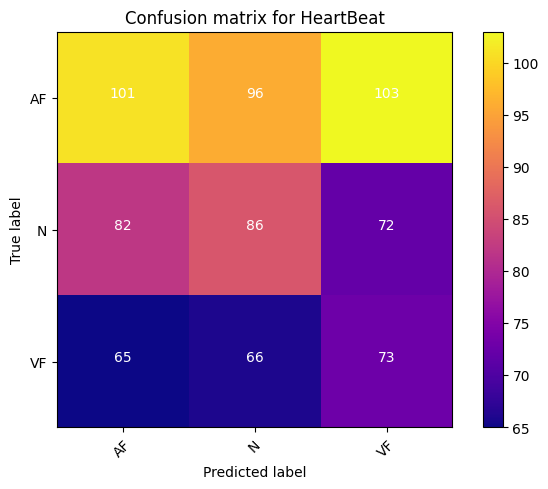

In [33]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from datetime import datetime
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time
from tqdm import tqdm
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
import warnings
import itertools
from itertools import product
import keras.models as models
# classifier
model = models.load_model("/content/drive/MyDrive/TrainData/slt__15db_ecg_1.0.h5")

filenames = os.listdir('/content/drive/MyDrive/TrainData/-15db_data/Training/AF')
filenames1 = os.listdir('/content/drive/MyDrive/TrainData/-15db_data/Training/N')
filenames2 = os.listdir('/content/drive/MyDrive/TrainData/-15db_data/Training/VF')
files = []
categories = []
for file in filenames:
    category = 'AF'
    files.append('/content/drive/MyDrive/TrainData/-15db_data/Training/AF/' + file)
    categories.append(category)

for file in filenames1:
    category = 'N'
    files.append('/content/drive/MyDrive/TrainData/-15db_data/Training/N/' + file)
    categories.append(category)

for file in filenames2:
    category = 'VF'
    files.append('/content/drive/MyDrive/TrainData/-15db_data/Training/VF/' + file)
    categories.append(category)
       
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

df['category'].value_counts()

le = preprocessing.LabelEncoder()
le.fit(df['category'])

y = le.transform(df['category'])


start = time.time()

x_train = []
y_train = []

for f in tqdm(df.filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

x_train = pd.DataFrame(x_train)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

k_range = range(1, 26)

# # We can create Python dictionary using [] or dict()
scores = []

# # We use a loop through the range 1 to 26
# # We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_pred, y_test))

print(scores)

clf = neighbors.KNeighborsClassifier(n_neighbors = 14, p = 1)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=1,
                     weights='uniform')

y_pred = clf.predict(x_test)
# print(y_pred)


cm = confusion_matrix(y_pred, y_test)

class_names = ["AF","N","VF"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for HeartBeat',cmap="plasma")

print("\n\nAccuracy: ", accuracy_score(y_pred, y_test))
print("f1_score: ",f1_score(y_pred, y_test, average="macro"))
print("\n\n")

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
